In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
input_shape=(28,28,1)

In [4]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [5]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [6]:
x_train=x_train/255
x_test=x_test/255
print("Shape of Training:",x_train.shape)
print("Shape of testing:",x_test.shape)

Shape of Training: (60000, 28, 28, 1)
Shape of testing: (10000, 28, 28, 1)


In [7]:
model=Sequential()
model.add(Conv2D(28, kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                      

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)


Epoch 1/10


1875/1875 [==============================] - 26s 13ms/step - loss: 0.1997 - accuracy: 0.9399
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0594 - accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0454 - accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0352 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0328 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0266 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0243 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0224 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 24s 

In [9]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss:%.3f" %test_loss)
print("Accuracy:%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0544 - accuracy: 0.9863
Loss:0.054
Accuracy:0.986


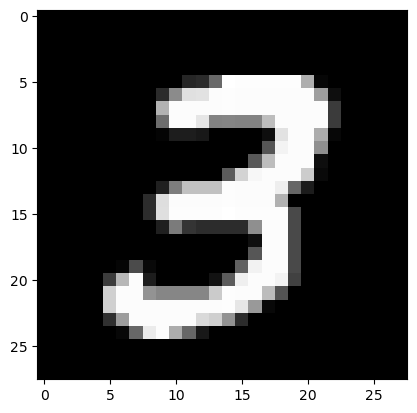

In [10]:
image=x_train[7]
plt.imshow(np.squeeze(image),cmap='gray') #single dimension ke entries ko remove karta hai
plt.show()

In [11]:
image = image.reshape(1,28,28,1)

# Make the prediction
predict_model = model.predict(image)

# Correct print statement with np.argmax
print("Predicted Class:", np.argmax(predict_model)) #maxium probability kontya class che ahe 

1/1 [==============================] - 0s 73ms/step
Predicted Class: 3
